In [1]:
from keystone.model import Net
from keystone.keystone import calculate_keystone_array
from keystone.data_loading import process_data

from main import train
from types import SimpleNamespace

import seaborn as sns
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
training_params = SimpleNamespace(
        file_path = './data/DKI_data/Ptrain.csv',
        batch_size = 32,
        val_size = 0.1,
        lr = 0.05,
        epochs = 1000,
        verbosity = 100,
        layers = [100]
    )

In [3]:
loss, network, train_loader, val_loader = train(training_params)

Epoch: 0 	Training Loss: 1.78e-04 	Validation Loss: 1.61e-04
Epoch: 100 	Training Loss: 1.71e-06 	Validation Loss: 1.83e-06
Epoch: 200 	Training Loss: 1.69e-06 	Validation Loss: 1.83e-06
Epoch: 300 	Training Loss: 1.54e-06 	Validation Loss: 1.63e-06
Epoch: 400 	Training Loss: 1.20e-06 	Validation Loss: 1.36e-06
Epoch: 500 	Training Loss: 9.76e-07 	Validation Loss: 1.14e-06
Epoch: 600 	Training Loss: 7.86e-07 	Validation Loss: 9.79e-07
Epoch: 700 	Training Loss: 6.78e-07 	Validation Loss: 8.73e-07
Epoch: 800 	Training Loss: 5.81e-07 	Validation Loss: 7.48e-07
Epoch: 900 	Training Loss: 5.19e-07 	Validation Loss: 6.78e-07


In [4]:
losses = torch.load('simple_net_loss.pt')
losses.keys()

dict_keys(['train', 'val'])

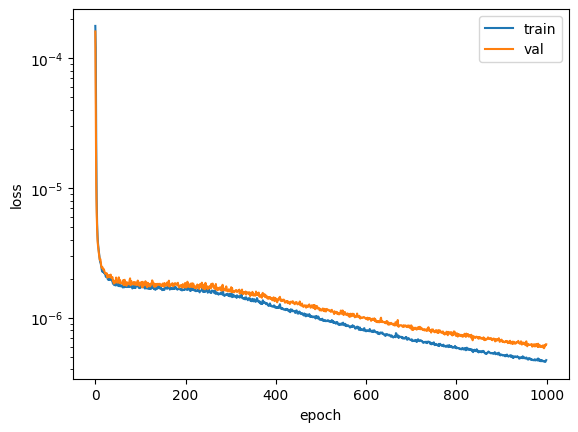

In [5]:
plt.semilogy(loss['train'], label='train')
plt.semilogy(loss['val'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [8]:
state_dict = torch.load('./simple_net.pt')
net = Net(100, 100, layers=[100])
net.load_state_dict(state_dict)

<All keys matched successfully>

In [6]:
X, Y = process_data('./data/DKI_data/Ptrain.csv')
# K = calculate_keystone_array(X, Y, net)

In [6]:
# kl divergence
loss = torch.nn.KLDivLoss()

In [33]:
eps = 1e-14
true = torch.log(torch.tensor(Y[0] + eps).unsqueeze(0))

In [34]:
true

tensor([[ -4.9961,  -4.5006, -32.2362, -32.2362, -32.2362,  -3.4537,  -3.2731,
         -32.2362, -32.2362, -32.2362, -32.2362, -32.2362, -32.2362,  -5.1321,
         -32.2362, -32.2362, -32.2362,  -4.0498, -32.2362,  -4.0688,  -4.4470,
          -3.3741, -32.2362,  -4.5707,  -3.4379, -32.2362, -32.2362,  -4.1696,
         -32.2362, -32.2362, -32.2362,  -5.2238,  -3.1437,  -3.4885,  -4.6439,
         -32.2362,  -4.3300,  -3.8788,  -5.1276,  -3.7976, -32.2362,  -4.3460,
          -3.4111,  -3.6784,  -3.9953, -32.2362, -32.2362, -32.2362, -32.2362,
         -32.2362,  -5.3315, -32.2362, -32.2362,  -4.2216, -32.2362, -32.2362,
         -32.2362, -32.2362,  -3.5469, -32.2362, -32.2362, -32.2362, -32.2362,
          -3.7525, -32.2362, -32.2362, -32.2362,  -4.3921,  -3.8199,  -4.3031,
         -32.2362,  -3.3462,  -3.8816,  -3.9671,  -4.2262, -32.2362, -32.2362,
         -32.2362,  -3.4692,  -3.7040, -32.2362,  -4.9916,  -4.0466,  -3.4931,
          -8.2074, -32.2362,  -3.4541, -32.2362, -32

In [35]:

pred = torch.log(net(torch.tensor(X[0] + eps).unsqueeze(0)))
pred

tensor([[-5.2646, -4.4210, -8.8035, -8.8035, -8.8035, -3.5390, -3.3106, -8.8035,
         -8.8035, -8.8035, -8.8035, -8.8035, -8.8035, -5.1105, -8.8035, -8.8035,
         -8.8035, -4.1068, -8.8035, -4.0260, -4.4989, -3.3654, -8.8035, -4.6843,
         -3.5212, -8.8035, -8.8035, -4.1964, -8.8035, -8.8035, -8.8035, -5.4396,
         -3.1677, -3.4361, -4.6630, -8.8035, -4.2922, -3.7208, -5.4230, -3.9457,
         -8.8035, -4.2684, -3.4170, -3.6441, -3.9941, -8.8035, -8.8035, -8.8035,
         -8.8035, -8.8035, -6.0049, -8.8035, -8.8035, -4.1862, -8.8035, -8.8035,
         -8.8035, -8.8035, -3.5490, -8.8035, -8.8035, -8.8035, -8.8035, -3.7533,
         -8.8035, -8.8035, -8.8035, -4.3334, -3.8271, -4.3798, -8.8035, -3.4529,
         -3.9392, -3.9461, -4.2556, -8.8035, -8.8035, -8.8035, -3.5507, -3.7377,
         -8.8035, -4.8636, -4.0812, -3.4266, -6.0238, -8.8035, -3.4790, -8.8035,
         -8.8035, -3.2234, -6.4017, -4.1434, -8.8035, -4.6199, -8.8035, -3.7078,
         -3.2486, -4.0875, -

In [36]:
torch.nn.functional.kl_div(pred, true, reduction='batchmean')

tensor(nan, grad_fn=<DivBackward0>)

In [28]:
true

tensor([[ -4.9961,  -4.5006, -29.9336, -29.9336, -29.9336,  -3.4537,  -3.2731,
         -29.9336, -29.9336, -29.9336, -29.9336, -29.9336, -29.9336,  -5.1321,
         -29.9336, -29.9336, -29.9336,  -4.0498, -29.9336,  -4.0688,  -4.4470,
          -3.3741, -29.9336,  -4.5707,  -3.4379, -29.9336, -29.9336,  -4.1696,
         -29.9336, -29.9336, -29.9336,  -5.2238,  -3.1437,  -3.4885,  -4.6439,
         -29.9336,  -4.3300,  -3.8788,  -5.1276,  -3.7976, -29.9336,  -4.3460,
          -3.4111,  -3.6784,  -3.9953, -29.9336, -29.9336, -29.9336, -29.9336,
         -29.9336,  -5.3315, -29.9336, -29.9336,  -4.2216, -29.9336, -29.9336,
         -29.9336, -29.9336,  -3.5469, -29.9336, -29.9336, -29.9336, -29.9336,
          -3.7525, -29.9336, -29.9336, -29.9336,  -4.3921,  -3.8199,  -4.3031,
         -29.9336,  -3.3462,  -3.8816,  -3.9671,  -4.2262, -29.9336, -29.9336,
         -29.9336,  -3.4692,  -3.7040, -29.9336,  -4.9916,  -4.0466,  -3.4931,
          -8.2074, -29.9336,  -3.4541, -29.9336, -29

In [30]:
pred - true

tensor([[ 0.3381, -0.1119,     inf,     inf,     inf, -1.0962, -1.2475,     inf,
             inf,     inf,     inf,     inf,     inf,  0.4817,     inf,     inf,
             inf, -0.5404,     inf, -0.5078, -0.1737, -1.1572,     inf, -0.0559,
         -1.1116,     inf,     inf, -0.4229,     inf,     inf,     inf,  0.5707,
         -1.3759, -1.0399,  0.0148,     inf, -0.2731, -0.6852,  0.4660, -0.7724,
             inf, -0.2586, -1.1272, -0.8814, -0.5819,     inf,     inf,     inf,
             inf,     inf,  0.6662,     inf,     inf, -0.3696,     inf,     inf,
             inf,     inf, -1.0068,     inf,     inf,     inf,     inf, -0.8170,
             inf,     inf,     inf, -0.2134, -0.7519, -0.2969,     inf, -1.1943,
         -0.6969, -0.6103, -0.3695,     inf,     inf,     inf, -1.0800, -0.8617,
             inf,  0.3625, -0.5428, -1.0349,  3.5481,     inf, -1.0841,     inf,
             inf, -1.2523,  1.3721, -0.2608,     inf,  0.0436,     inf, -0.7314,
         -1.3394, -0.5332, -

In [28]:
torch.nn.functional.kl_div(pred, true)

tensor(nan, grad_fn=<MeanBackward0>)

In [12]:
print(torch.nn.functional.mse_loss(net(torch.tensor(X[0]).unsqueeze(0)), torch.tensor(Y[0]).unsqueeze(0)))
print(loss(F.log_softmax(net(torch.tensor(X[0:10]))), F.log_softmax(torch.tensor(Y[0:10]))))

tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)


/tmp/ipykernel_1293867/1704408226.py:2: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  print(loss(F.log_softmax(net(torch.tensor(X[0:10]))+0.000001), F.log_softmax(torch.tensor(Y[0:10])+0.000001)))


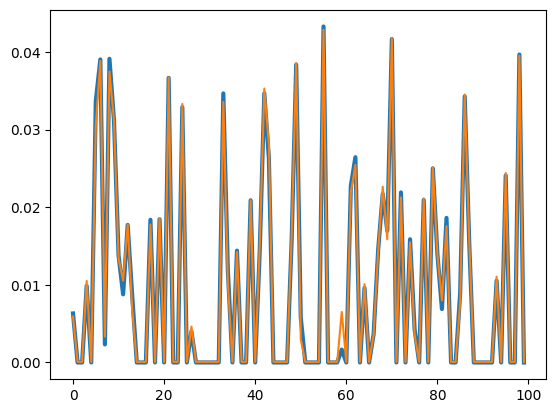

In [9]:
i = 150
predicted = net(torch.tensor(X[i]).unsqueeze(0))
plt.plot(Y[i], label='true', lw=3)
plt.plot(predicted.detach().numpy().T, label='predicted')

<Axes: >

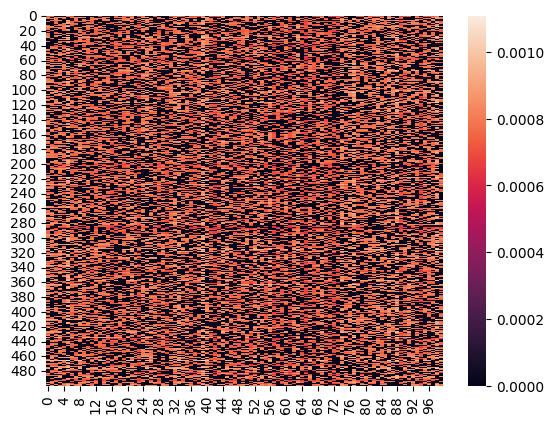

In [29]:
sns.heatmap(K)

In [30]:
indices = np.where(K.T != 0)
non_zero = np.array([(i+1, j+1, K.T[i,j]) for i, j in zip(indices[0], indices[1])])
dataframe = pd.DataFrame(non_zero, columns=['i', 'j', 'K[i,j]'])
my_keystones = dataframe["K[i,j]"].values

DKI_keystone = np.genfromtxt('./data/DKI_data/keystoness_species.csv', delimiter=',')[1:,:]
pred_keystones = DKI_keystone[:,0]
true_keystones = DKI_keystone[:,2]

In [31]:
# save as csv
np.savetxt('keystoness.csv', K, delimiter=',', header='i,j,K[i,j]')

In [32]:
import pandas as pd
dataframe = pd.DataFrame(non_zero, columns=['Species', 'Sample', 'Structural Keystoness'])
dataframe.tail(20)

,Species,Sample,Structural Keystoness
24980,100.0,459.0,0.000760
24981,100.0,461.0,0.000797
24982,100.0,462.0,0.000757
24983,100.0,463.0,0.000845
24984,100.0,467.0,0.000921
24985,100.0,468.0,0.000758
24986,100.0,470.0,0.000844
24987,100.0,471.0,0.000775
24988,100.0,473.0,0.000721
24989,100.0,474.0,0.000841


Text(0.005, 0.02, '${\\rho}$ = 0.0198')

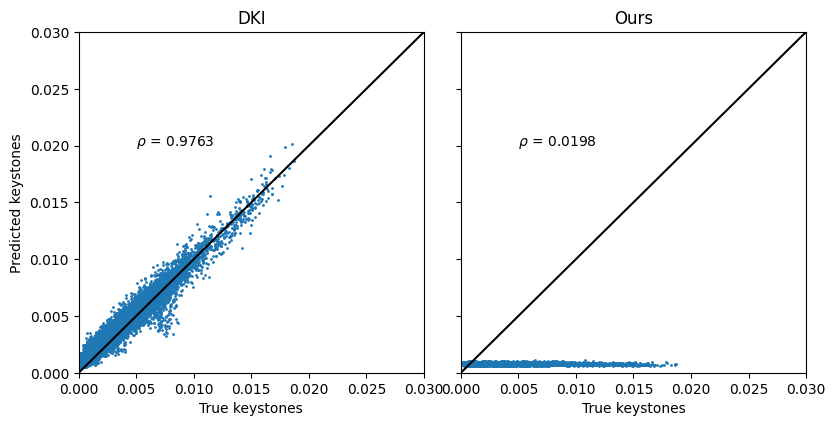

In [33]:

fig, (ax1, ax2) = plt.subplots(figsize=(8,4), ncols=2, sharey=True)
fig.tight_layout()
ax1.scatter(true_keystones, pred_keystones, s=1)
ax1.plot([0,0.03], [0,0.03], 'k-')
ax1.set_xlim(0,0.03)
ax1.set_ylim(0,0.03)
ax1.set_xlabel('True keystones')
ax1.set_ylabel('Predicted keystones')
ax1.set_title('DKI')

ax2.scatter(true_keystones, my_keystones, s=1)
ax2.plot([0,0.03], [0,0.03], 'k-')
ax2.set_xlim(0,0.03)
ax2.set_ylim(0,0.03)
ax2.set_xlabel('True keystones')
ax2.set_title('Ours')

# correlation
from scipy.stats import pearsonr
ax1.text(0.005,0.02,f"${{\\rho}}$ = {pearsonr(true_keystones, pred_keystones)[0]:.4f}")
ax2.text(0.005,0.02,f"${{\\rho}}$ = {pearsonr(true_keystones, my_keystones)[0]:.4f}")


# North American Data

In [15]:
training_params = SimpleNamespace(
        file_path = './data/Ptrain_NA.csv',
        batch_size = 32,
        val_size = 0.1,
        lr = 0.05,
        epochs = 3000,
        verbosity = 100,
        layers = [1324]
    )

In [16]:
loss, model = train(training_params)

Epoch: 0 	Training Loss: 8.23e-05 	Validation Loss: 8.34e-05
Epoch: 100 	Training Loss: 1.91e-05 	Validation Loss: 2.10e-05
Epoch: 200 	Training Loss: 1.30e-05 	Validation Loss: 1.69e-05
Epoch: 300 	Training Loss: 1.06e-05 	Validation Loss: 1.56e-05
Epoch: 400 	Training Loss: 8.92e-06 	Validation Loss: 1.44e-05
Epoch: 500 	Training Loss: 7.88e-06 	Validation Loss: 1.43e-05
Epoch: 600 	Training Loss: 7.17e-06 	Validation Loss: 1.44e-05
Epoch: 700 	Training Loss: 6.52e-06 	Validation Loss: 1.41e-05
Epoch: 800 	Training Loss: 6.13e-06 	Validation Loss: 1.40e-05
Epoch: 900 	Training Loss: 5.57e-06 	Validation Loss: 1.40e-05
Epoch: 1000 	Training Loss: 5.13e-06 	Validation Loss: 1.38e-05
Epoch: 1100 	Training Loss: 4.92e-06 	Validation Loss: 1.39e-05
Epoch: 1200 	Training Loss: 4.83e-06 	Validation Loss: 1.38e-05
Epoch: 1300 	Training Loss: 4.73e-06 	Validation Loss: 1.38e-05
Epoch: 1400 	Training Loss: 4.30e-06 	Validation Loss: 1.37e-05
Epoch: 1500 	Training Loss: 4.03e-06 	Validation Los

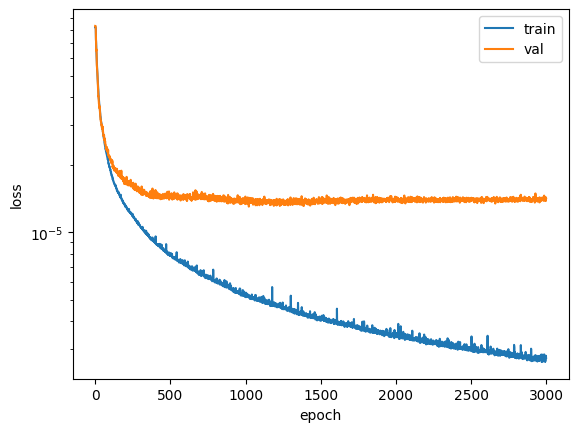

In [17]:
plt.semilogy(loss['train'], label='train')
plt.semilogy(loss['val'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [18]:
state_dict = torch.load('./simple_net.pt')
net = Net(1324, 1324, layers=[1324])

net.load_state_dict(state_dict)

<All keys matched successfully>

In [19]:
X, Y = process_data('./data/Ptrain_NA.csv')
# K = calculate_keystone_array(X, Y, net)
# X.shape

In [20]:
sns.heatmap(K)

NameError: name 'K' is not defined

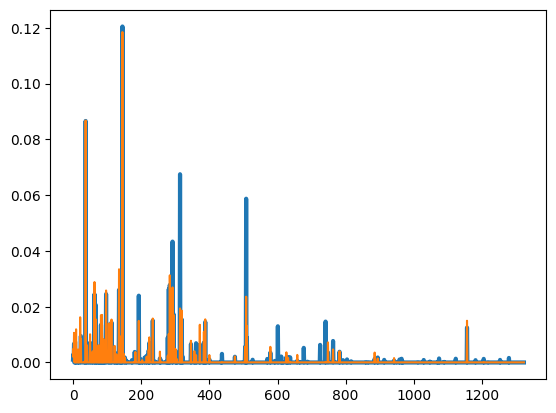

In [24]:
i = 5
predicted = net(torch.tensor(X[i]).unsqueeze(0))
plt.plot(Y[i], label='true', lw=3)
plt.plot(predicted.detach().numpy().T, label='predicted')

In [12]:
indices = np.where(K.T != 0)
non_zero = np.array([(i+1, j+1, K.T[i,j]) for i, j in zip(indices[0], indices[1])])
dataframe = pd.DataFrame(non_zero, columns=['i', 'j', 'K[i,j]'])
my_keystones = dataframe["K[i,j]"].values

In [16]:
A = my_keystones.reshape(-1, )

ValueError: cannot reshape array of size 435420 into shape (1324,newaxis)

# Implementing the Neural ODE from cNode
### (or whatever it's called)

In [25]:
import torch
import torch.nn as nn
from torchdiffeq import odeint

In [26]:
def get_batch(ztrn,ptrn,mb_size):
    s = torch.from_numpy(np.random.choice(np.arange(ptrn.size(dim=0), dtype=np.int64), mb_size, replace=False))
    batch_p = ztrn[s,:]
    batch_q = ptrn[s,:]
    batch_t = torch.tensor(np.linspace(0, 1, 100, endpoint=False), dtype=torch.float32)
    return batch_p.to(device), batch_q.to(device), batch_t.to(device)


def loss_bc(p_i, q_i):
    return torch.sum(torch.abs(p_i-q_i))/torch.sum(torch.abs(p_i+q_i))


def process_data(P):
    Z = P.copy()
    Z[Z>0] = 1
    P = P/P.sum(axis=0)[np.newaxis,:]
    Z = Z/Z.sum(axis=0)[np.newaxis,:]
    
    P = P.astype(np.float32)
    Z = Z.astype(np.float32)

    P = torch.from_numpy(P.T)
    Z = torch.from_numpy(Z.T)
    return P,Z


class ODEFunc(torch.nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.fcc1 = torch.nn.Linear(N, N)
        self.fcc2 = torch.nn.Linear(N, N)

    def forward(self, t, y):
        out = self.fcc1(y)
        out = nn.ReLU()(out)
        out = self.fcc2(out)
        f = torch.matmul(torch.matmul(torch.ones(y.size(dim=1),1),y),torch.transpose(out,0,1))
        return torch.mul(y,out-torch.transpose(f,0,1))

In [27]:
from tqdm import tqdm
import copy
import numpy as np

In [28]:
def train_reptile(max_epochs,mb,LR,ztrn,ptrn,zval,pval):
    loss_train = []
    loss_val = []
    
    func = ODEFunc().to(device)
    optimizer = torch.optim.Adam(func.parameters(), lr=LR)

    Loss_opt = 1
    loop_obj = tqdm(range(max_epochs))
    for e in loop_obj:
        
        func.train()
        optimizer.zero_grad()
        batch_p, batch_q, batch_t = get_batch(ztrn,ptrn,mb)
        
        for i in range(mb):
            p_pred = odeint(func,batch_p[i].unsqueeze(dim=0),batch_t)
            p_pred = torch.reshape(p_pred[-1,:,:],(1,N))
            if i==0:
                loss = loss_bc(p_pred.unsqueeze(dim=0),batch_q[i].unsqueeze(dim=0))
            else:
                loss = loss + loss_bc(p_pred.unsqueeze(dim=0),batch_q[i].unsqueeze(dim=0))
                
        loss_train.append(loss.item()/mb)

        func.zero_grad()
        loss.backward()
        optimizer.step()

        func.eval()
        for i in range(zval.size(dim=0)):
            with torch.no_grad():
                p_pred = odeint(func,zval[i].unsqueeze(dim=0),batch_t)
            p_pred = torch.reshape(p_pred[-1,:,:],(1,N))
            if i==0:
                l_val = loss_bc(p_pred.unsqueeze(dim=0),pval[i].unsqueeze(dim=0))
            else:
                l_val = l_val + loss_bc(p_pred.unsqueeze(dim=0),pval[i].unsqueeze(dim=0))
        loss_val.append(l_val.item()/zval.size(dim=0))
        if l_val.item()/zval.size(dim=0)<=Loss_opt:
            Loss_opt = loss_val[-1]
            best_model = copy.deepcopy(func)

        # update the neural network
        

        loop_obj.set_postfix_str(f"epoch: {e+1}, train loss: {loss_train[-1]:.4f} val loss: {loss_val[-1]:.4f}")
        

    return best_model, loss_train, loss_val

In [29]:
# hyperparameters
max_epochs = 100
device = 'cpu'
batch_time = 100
t = torch.arange(0.0, batch_time, 0.01)

# load the dataset
filepath_train = './data/Ptrain_NA.csv'
# filepath_test = './data/DKI_data/Ptest.csv' # Replace "Ptest.csv" with "Ztest.csv" for real dataset.



In [30]:
P = np.loadtxt(filepath_train,delimiter=',')
number_of_cols = P.shape[1]
random_indices = np.random.choice(number_of_cols, size=int(0.2*number_of_cols), replace=False)
P_val = P[:,random_indices]
P_train =  P[:,np.setdiff1d(range(0,number_of_cols),random_indices)]
ptrn,ztrn = process_data(P_train)
pval,zval = process_data(P_val)
pall,zall = process_data(P)

M, N = ptrn.shape

In [31]:
LR = 0.01
mb = 20

best_model, loss_train, loss_val = train_reptile(max_epochs,mb,LR,ztrn.to(device),ptrn.to(device),zval.to(device),pval.to(device))

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [48:20<00:00, 29.00s/it, epoch: 100, train loss: 0.3465 val loss: 0.3023]


Text(0, 0.5, 'Loss')

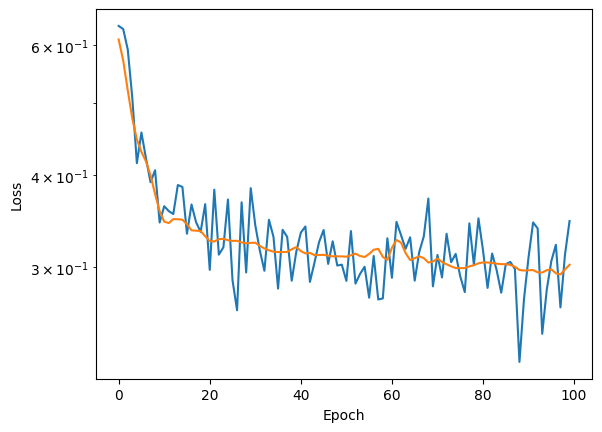

In [32]:
import matplotlib.pyplot as plt

plt.semilogy(loss_train)
plt.plot(loss_val)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [58]:
X, Y = process_data('./data/DKI_data/Ptrain.csv')
K = calculate_keystone_array(X, Y, best_model)

100%|██████████| 500/500 [20:39<00:00,  2.48s/it]


Text(0.005, 0.02, '${\\rho}$ = 0.0033')

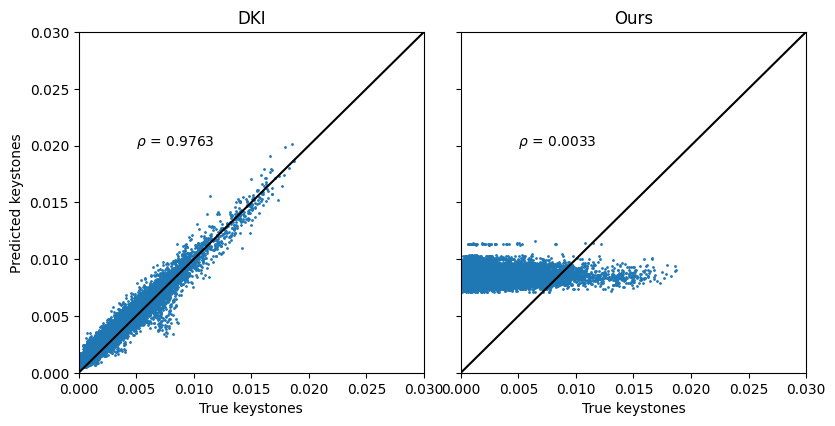

In [59]:
indices = np.where(K.T != 0)
non_zero = np.array([(i+1, j+1, K.T[i,j]) for i, j in zip(indices[0], indices[1])])
dataframe = pd.DataFrame(non_zero, columns=['i', 'j', 'K[i,j]'])
my_keystones = dataframe["K[i,j]"].values

DKI_keystone = np.genfromtxt('./data/DKI_data/keystoness_species.csv', delimiter=',')[1:,:]
pred_keystones = DKI_keystone[:,0]
true_keystones = DKI_keystone[:,2]

import pandas as pd
dataframe = pd.DataFrame(non_zero, columns=['Species', 'Sample', 'Structural Keystoness'])


fig, (ax1, ax2) = plt.subplots(figsize=(8,4), ncols=2, sharey=True)
fig.tight_layout()
ax1.scatter(true_keystones, pred_keystones, s=1)
ax1.plot([0,0.03], [0,0.03], 'k-')
ax1.set_xlim(0,0.03)
ax1.set_ylim(0,0.03)
ax1.set_xlabel('True keystones')
ax1.set_ylabel('Predicted keystones')
ax1.set_title('DKI')

ax2.scatter(true_keystones, my_keystones, s=1)
ax2.plot([0,0.03], [0,0.03], 'k-')
ax2.set_xlim(0,0.03)
ax2.set_ylim(0,0.03)
ax2.set_xlabel('True keystones')
ax2.set_title('Ours')

# correlation
from scipy.stats import pearsonr
ax1.text(0.005,0.02,f"${{\\rho}}$ = {pearsonr(true_keystones, pred_keystones)[0]:.4f}")
ax2.text(0.005,0.02,f"${{\\rho}}$ = {pearsonr(true_keystones, my_keystones)[0]:.4f}")


In [33]:
batch_t = torch.tensor(np.linspace(0, 1, 100, endpoint=False), dtype=torch.float32)
p_pred = odeint(best_model, torch.tensor(X[0]).unsqueeze(dim=0), batch_t)[-1,:,:]
# torch.reshape(p_pred[-1,:,:],(1,N))

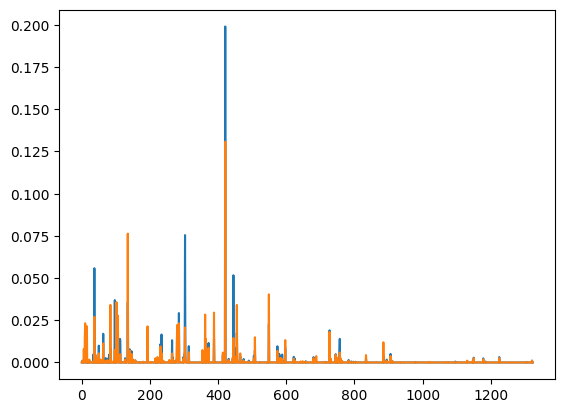

In [34]:
plt.plot(p_pred.detach().numpy().flatten())
plt.plot(Y[0])

In [57]:
import numpy as np
import torch
from scipy.spatial import distance
from tqdm import tqdm


def calculate_keystone(j, sample, original_abundance, model):
    # if the abundance is already zero, then the keystone index is zero
    p = original_abundance[j]

    if p == 0:
        return 0

    new_sample = sample.copy()

    sample = torch.tensor(sample, dtype=torch.float32)
    new_sample = torch.tensor(new_sample, dtype=torch.float32)
    with torch.no_grad():
        new_abundance = odeint(best_model, sample.reshape(1, -1), batch_t)[-1,:,:].detach().numpy().flatten()
        # new_abundance = model(torch.tensor(sample.reshape(1, -1), dtype=torch.float32)).numpy().flatten()

    new_sample[j] = 0
    new_abundance[j] = 0

    null_abundance = new_abundance / new_abundance.sum()

    with torch.no_grad():
        # predicted_abundance = model(torch.tensor(new_sample.reshape(1, -1), dtype=torch.float32)).numpy()
        predicted_abundance = odeint(best_model, new_sample.reshape(1, -1), batch_t)[-1,:,:].detach().numpy().flatten()
    
    k = distance.braycurtis(null_abundance, predicted_abundance.flatten()) * (1 - p)

    return k



def calculate_keystone_array(sample_array, sample_abundances, model):
    K = np.zeros((sample_array.shape[0], sample_array.shape[1]))

    for i, sample in enumerate(tqdm(sample_array)):
        original_abundance = sample_abundances[i]
        for j, _ in enumerate(sample):
            K[i, j] = calculate_keystone(j, sample, original_abundance, model)
            
    return K

In [21]:
SOLVERS = {
    'dopri8': 1,
    'dopri5': 2,
}

In [22]:
SOLVERS[None]

KeyError: None

In [72]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset


class SampleDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.batch_t = torch.tensor(np.linspace(0, 1, 100, endpoint=False), dtype=torch.float32)
        
        # make batch time the same size as the input
        # self.batch_t = self.batch_t.repeat(self.X.shape[0], 1)

        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.Y[index], self.batch_t

    def __len__(self):
        return self.len


def process_data(file_path):
    P = np.loadtxt(file_path,delimiter=',')
    Y = P.T
    X = Y.copy()
    X[X>0] = 1
    Y = Y/Y.sum(axis=1).reshape(-1,1)
    X = X/X.sum(axis=1).reshape(-1,1)
    
    Y = Y.astype(np.float32)
    X = X.astype(np.float32)

    return X, Y


def get_data_loaders(file_path, batch_size, test_size):
    X, Y = process_data(file_path)

    if test_size > 0.0:
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_size)

        train_dataset = SampleDataset(X_train, Y_train)
        val_dataset = SampleDataset(X_val, Y_val)

        train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)
    
    else:
        train_dataset = SampleDataset(X, Y)
        train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = None

    num_features = X.shape[1]

    return train_loader, val_loader, num_features

In [73]:
class ODEFunc(torch.nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.fcc1 = torch.nn.Linear(N, N)
        self.fcc2 = torch.nn.Linear(N, N)

    def forward(self, t, y):
        out = self.fcc1(y)
        out = nn.ReLU()(out)
        out = self.fcc2(out)
        out = torch.mul(out, y)
        out = nn.Softmax(dim=1)
        return out


In [74]:
train_loader, val_loader, num_features = get_data_loaders('./data/DKI_data/Ptrain.csv', 16, 0.1)

In [75]:
device = 'cuda'

loss_fn = nn.MSELoss()

net = ODEFunc().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.01)

In [76]:
# get single batch
X, Y, t = next(iter(train_loader))

In [78]:
p_pred = odeint(net, X, t)

AssertionError: t must be one dimensional

In [68]:
batch_p, batch_q, batch_t = get_batch(ztrn,ptrn,mb)

In [70]:
batch_t.shape

torch.Size([100])